In [1]:
from FKM import *

init_printing()

In [2]:
t = Symbol('t')
q1 = Function('q1')(t)
q2 = Function('q2')(t)
l1 = Symbol('l1')
l2 = Symbol('l2')
lc1 = Symbol('lc1')
lc2 = Symbol('lc2')
m1 = Symbol('m1')
m2 = Symbol('m2')
i1 = Symbol('I1')
i2 = Symbol('I2')
g = Symbol('g')

q = np.array([[0], [q1], [q2]])
qd = np.array([[0], [diff(q1, t)], [diff(q2, t)]])
qdd = np.array([[0], [diff(diff(q1, t), t)], [diff(diff(q2, t), t)]])
m = [0, m1, m2]
I = [0, i1, i2]

def show(matriz):
    O = Matrix(matriz)
    O = O.subs(diff(diff(q1, t), t), Symbol('\ddot{q_1}'))
    O = O.subs(diff(diff(q2, t), t), Symbol('\ddot{q_2}'))
    O = O.subs(diff(q1, t), Symbol('\dot{q_1}'))
    O = O.subs(diff(q2, t), Symbol('\dot{q_2}'))
    O = simplify(O)
    O = O.subs(sin(q1), Symbol('s1'))
    O = O.subs(sin(q2), Symbol('s2'))
    O = O.subs(cos(q1), Symbol('c1'))
    O = O.subs(cos(q2), Symbol('c2'))
    O = O.subs(q1, Symbol('q1'))
    O = O.subs(q2, Symbol('q2'))
    return O

<h2 align='center'> Extraindo o MCD: </h2>

In [3]:
RP = Robot((
    [q1, 0, l1, rad(-90)],
    [0, q2, 0, 0]
))

A1 = RP.HTM(0, 1, False)
A2 = RP.HTM(1, 2, False)
H02 = RP.HTM(0, 2, False)

### $$A_1 \text{ :}$$

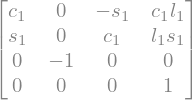

In [4]:
show(A1)

### $$A_2 \text{ :}$$

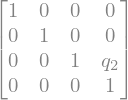

In [5]:
show(A2)

### $$H_2^0 \text{ :}$$

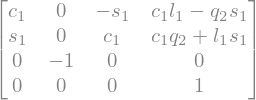

In [6]:
show(H02)

<h2 align='center'> Obtendo as jacobianas de velocidades: </h2>

### $$Jv_{c,1} \text{ :}$$

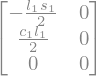

In [7]:
oc1 = A1[0:3, 3].subs(l1, (l1/2))

jvc1 = Matrix(np.block([diff(oc1, q1), diff(oc1, q2)]))

show(jvc1)

### $$Jv_{c,2} \text{ :}$$

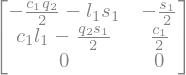

In [8]:
oc2 = H02[0:3, 3].subs(q2, (q2/2))

jvc2 = Matrix(np.block([diff(oc2, q1), diff(oc2, q2)]))

show(jvc2)

### $$\omega_1 \text{ :}$$

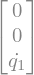

In [9]:
w1 = Matrix(np.array([[0], [0], [1]])*qd[1])

show(w1)

### $$\omega_2 \text{ :}$$

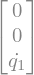

In [10]:
w2 = Matrix(w1)

show(w2)

### $$J\omega_{c,1} \text{ :}$$

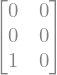

In [11]:
jwc1 = Matrix(np.block([diff(w1, qd[1][0]), diff(w1, qd[2][0])]))

show(jwc1)

### $$J\omega_{c,2} \text{ :}$$

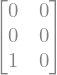

In [12]:
jwc2 = Matrix(np.block([diff(w2, qd[1][0]), diff(w2, qd[2][0])]))

show(jwc2)

<h2 align='center'> Obtendo as componentes de energia cinética translacional: </h2>

### $$k_{t,1} \text{ :}$$

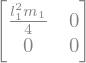

In [13]:
kt1 = m1*(jvc1.T@jvc1)

show(kt1)

### $$k_{t,2} \text{ :}$$

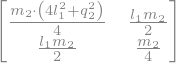

In [14]:
kt2 = m2*(jvc2.T@jvc2)

show(kt2)

<h2 align='center'> Obtendo as componentes de energia cinética angular: </h2>

### $$k_{a,1} \text{ :}$$

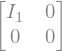

In [15]:
R1 = A1[0:3, 0:3]

ka1 = i1*(jwc1.T@R1@R1.T@jwc1)

show(ka1)

### $$k_{a,2} \text{ :}$$

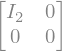

In [16]:
R2 = H02[0:3, 0:3]

ka2 = i2*(jwc2.T@R2@R2.T@jwc2)

show(ka2)

<h2 align='center'> Obtendo a matriz de inércia: </h2>

### $$D(q) \text{ :}$$

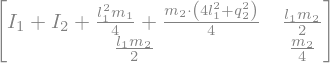

In [17]:
aux = (kt1+kt2+ka1+ka2)

D = np.array([[aux[0], aux[1]], [aux[2], aux[3]]])

show(D)

<h2 align='center'> Obtendo os símbolos de Christoffel (Coriolis): </h2>

### $$C(q, \dot{q}) \text{ :}$$

In [18]:
c = (np.ones((2, 2, 2))*t)

for k in range(2):
    for j in range(2):
        for i in range(2):
            c[i][j][k] = simplify((1/2)*(diff(D[k][j], q[i+1][0]) + diff(D[k][i], q[j+1][0]) - diff(D[i][j], q[k+1][0])))
            print(f'c{i+1}{j+1}{k+1} = {c[i][j][k]}')

c111 = 0
c211 = 0.25*m2*q2(t)
c121 = 0.25*m2*q2(t)
c221 = 0
c112 = -0.25*m2*q2(t)
c212 = 0
c122 = 0
c222 = 0


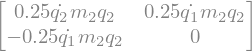

In [19]:
C = np.ones((2, 2))*t

for k in range(2):
    for j in range(2):
        C[k][j] = ((c[0][j][k]*qd[1][0]) + (c[1][j][k]*qd[2][0]))

show(C)

<h2 align='center'> Obtendo a matriz de componentes gravitacionais: </h2>

### $$G(q) \text{ :}$$

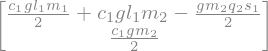

In [20]:
g0 = np.array([[0], [-g], [0]])

p1 = -m1*(g0.T@oc1)
p2 = -m2*(g0.T@oc2)
P = (p1 + p2)

G = np.array([[diff(P[0], q1)], [diff(P[0], q2)]])

show(G).expand()

<h2 align='center'> Formulação Lagrangeana: </h2>

### $$\text{A partir da equação da dinâmica :}$$ $$ D(q)\ddot{q} + C(q,\dot{q})\dot{q} + G(q) = \begin{bmatrix} \tau_1\\ f_2 \end{bmatrix}$$

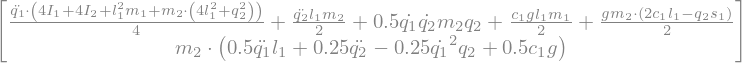

In [21]:
sol = ((D@qdd[1:3]) + (C@qd[1:3]) + G)

show(sol)

<h2 align='center'> Solução Dinâmica Final: </h2>

### $$\tau_1 \text{ :}$$

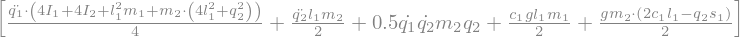

In [22]:
show(sol[0])

### $$f_2 \text{ :}$$

In [23]:
show(sol[1]).expand()